# <center> <span style="color:indigo">        Escuela de ML y DL Módulo 1</span> </center> 
##  <center> <span style="color:DarkBlue">          Tarea 2: Regresión logística </span>  </center>
##  <center> <span style="color:DarkBlue"> Nombre y Apellidos: Norma Paulina Lopez Zamora </span>  </center>
##  <center> <span style="color:DarkBlue"> Correo electrónico: paulinalopezn1@gmail.com</span>  </center>
##  <center> <span style="color:DarkBlue"> Abril 2024</span>  </center>

dataset: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma


1. <span style="color:DarkBlue">Planteamiento del problema (qué hacer)</span>

Construir un modelo de regresión logística binario para encontrar patrones entre las solicitudes realizadas a Uber y Lyft.
Hacer un análisis de los resultados usando como métricas: la exactitud (accuracy), la sensibilidad (recall) y la métrica F1 (Score F1).

2. <span style="color:DarkBlue">Planteamiento de la solución (cómo se hizó)</span>

Se siguieron los pasos descritos en la práctica 2-Regresión lineal


3. <span style="color:DarkBlue">Ejemplo de ejecución (código)</span>

A continuación se presenta el código









## Contenido.-
    1. Preparar los datos.
    2. Análisis Exploratorio de Datos (EDA).
    3. Imputar datos nulos
    4. Visualizar los datos.
    5. Crear la matriz de atributos y el vector de etiquetas.
    6. Escalar los datos (para cada atributo).
    7. Evaluar el error.
    8. Realizar la regresión.
    9. Comparar las predicciones.

In [48]:
import os#sistema operativo
import zipfile#abrimos archivo zip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, f1_score)#m
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


In [49]:
PATH = "./datos_tarea/"

---

## 1. Preparar los datos.

El archivo original ha sido renombrado como "California-housing.zip"

In [50]:
# Solo ejecutar la primera vez, ya que después de eso, 
# la carpeta ya estará creada con los archivos necesarios
with zipfile.ZipFile(PATH + 'rideshare_kaggle.csv.zip', 'r') as archive:
   archive.extractall(PATH)

In [51]:
os.listdir(PATH)

['.ipynb_checkpoints', 'rideshare_kaggle.csv', 'rideshare_kaggle.csv.zip']

In [52]:
ride = pd.read_csv(PATH + 'rideshare_kaggle.csv')

In [53]:
ride.head()#vemos los datos

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


---

## 2. Análisis Exploratorio de Datos (EDA).

Esto se realiza con el fin de darnos una idea de cómo son los datos y qué contienen.

In [54]:
ride.info() #vemos el tipo de dato de cada columna, hay algunos que no tienen el tipo de dato correcto, por ejemplo 
#la columna datetime es tipo objeto 
#vemos que es un dataset con 57 columnas y 693 071 registros 
#vemos que no hay valores nulos, a excepcion de la columna "price", 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [55]:
ride.isna().sum()#vemos que en la columna "price" hay 55, 095 datos faltantes 
#considerando que este valor es menor al 10% del total de datos, voy a rellenar los datos nulos de esta columna

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [56]:
ride.describe()
#vemos que la media de price es 16.54, el valor minimo es 2.5 y el valor maximo de 97.5, la mediana es de 13.5
#considero que en este caso es mejor rellenerar los datos nulos con el valor de la mediana 

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Los datos se encuentran en diferentes escalas, por lo tanto es necesario **escalar los datos**.

In [57]:
ride['datetime'] = pd.to_datetime(ride['datetime'])

In [58]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

## 3. Imputar datos nulos

Rellenamos los datos de "price" con el valor de la mediana de esos datos.

In [59]:
# Reemplazamos valores sulos con la mediana de los datos de price 
ride_median = ride['price'].median()#calculamos la mediana
ride_median = ride['price'].median()#calculamos la mediana 
ride.fillna({'price': ride_median}, inplace = True)#rellena valores nulos con datos de train median

In [60]:
ride.price.isna().sum()#verificamos que ya no hay valores nulos 

0

In [61]:
ride.isna().sum()#verificamos que el dataset ya no tiene valores nulos

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

### eliminaré columnas que considero no son de utilidad para el modelo

In [62]:
ride.timezone.value_counts()# vemos que en esta columna el mismo valor se repite en todos los datos, por lo que decido eliminarla junto con otras que 
#considero deben ser eliminadas


timezone
America/New_York    693071
Name: count, dtype: int64

In [63]:

ridecop=ride.drop(['timezone', 'product_id', 'id', 'short_summary','datetime','timestamp','windGustTime', 'temperatureHighTime','apparentTemperatureLowTime','temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime','apparentTemperatureMaxTime','sunriseTime', 'sunsetTime', 'uvIndexTime'], axis= 1 )#columnas a eliminar
#short_summary la elimino y dejo la variable long_summary
#de la columna datetime ya tenemos separados los dias, meses y horas, el año es el mismo para todos los datos, por lo cual tambien se eliminara


In [64]:
ridecop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         693071 non-null  int64  
 1   day                          693071 non-null  int64  
 2   month                        693071 non-null  int64  
 3   source                       693071 non-null  object 
 4   destination                  693071 non-null  object 
 5   cab_type                     693071 non-null  object 
 6   name                         693071 non-null  object 
 7   price                        693071 non-null  float64
 8   distance                     693071 non-null  float64
 9   surge_multiplier             693071 non-null  float64
 10  latitude                     693071 non-null  float64
 11  longitude                    693071 non-null  float64
 12  temperature                  693071 non-null  float64
 13 

### 4.Codificar los datos categóricos de las columnas ```source```, ```destination``` , ```cab_type```,```name```, ```long_summary```

In [65]:
columnas = ['source', 'destination', 'cab_type', 'name','long_summary', 'icon']#son 4 columnas a codificar 

# Objeto para codificar, usamos labelencoder
#3 funciones:
#fit= aprende parametros de la opracion que queremos hacer 
#trasform= transformamos lo anterio del fit 
#aprende parametros y que aplique transformacion usamos fit_transform
le = LabelEncoder()
OHO = OneHotEncoder()

# Para el conjunto 'train' (se usa 'apply' porque son varias columnas)#para cada columna "aplica" la funcion fit transform del objetoo label encoder
ridecop_enc=ridecop.iloc[:, :]
ridecop_enc[columnas] = ridecop_enc[columnas].apply(le.fit_transform)


In [66]:
# le = LabelEncoder() 
# OHO = OneHotEncoder()

# # Usar LabelEncoder
# categorical_data_le = data_nuevo.select_dtypes(include=['object']) # elegimos todas las columnas con atributos de tipo objeto
# categorical_data_le.loc[:, :] = categorical_data_le.loc[:, :].apply(le.fit_transform) 

# categorical_data_le.head()

In [67]:
ridecop_enc.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,5,7,0,7,5.0,0.44,1.0,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,5,7,0,2,11.0,0.44,1.0,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,5,7,0,5,7.0,0.44,1.0,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,5,7,0,4,26.0,0.44,1.0,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,5,7,0,6,9.0,0.44,1.0,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


---

## 5. Visualización de datos.

In [68]:
dff= ridecop_enc.groupby(['cab_type', 'price']).sum().reset_index()

dff

,cab_type,price,hour,day,month,source,destination,name,distance,surge_multiplier,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,0,2.5,2293,3724,2450,1178,1184,1477,263.55,211.0,...,155.76,39,1742.672,66663.1,118.70,8.2273,6986.48,9448.11,6126.48,8722.32
1,0,3.0,63989,98174,64243,31123,32391,38801,8238.20,5543.0,...,3789.57,1383,46853.693,1738208.4,3223.81,205.6365,185597.37,251106.35,164835.70,233193.09
2,0,3.5,58169,90148,58669,28510,29285,35441,7481.05,5063.0,...,3481.67,1284,42721.286,1588528.5,2927.51,195.0210,170242.14,229716.80,151427.76,213080.15
3,0,5.0,163112,250626,162334,75356,79287,97840,20936.29,14014.0,...,9587.78,3458,118933.652,4400308.8,8101.77,519.6589,468405.24,634022.29,416157.32,588271.35
4,0,7.0,418760,637681,415405,198239,200548,218731,68409.72,35856.5,...,24558.62,8974,304193.183,11240494.4,20823.80,1338.0958,1200805.71,1623576.18,1067233.89,1506549.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1,76.0,37,56,22,13,6,12,9.87,2.0,...,2.00,1,17.992,570.5,1.43,0.1229,68.87,88.54,66.24,85.22
169,1,80.5,7,18,12,7,8,1,3.37,1.0,...,0.99,0,7.113,362.8,0.37,0.0028,23.23,38.10,12.12,32.10
170,1,81.5,1,29,11,4,2,1,4.44,1.0,...,0.77,0,9.915,349.9,0.72,0.0000,33.85,42.61,30.03,36.57
171,1,87.0,17,14,12,4,2,1,5.56,1.0,...,0.16,1,9.962,289.1,0.24,0.0000,26.93,46.68,27.58,43.98


<Axes: xlabel='distance', ylabel='cab_type'>

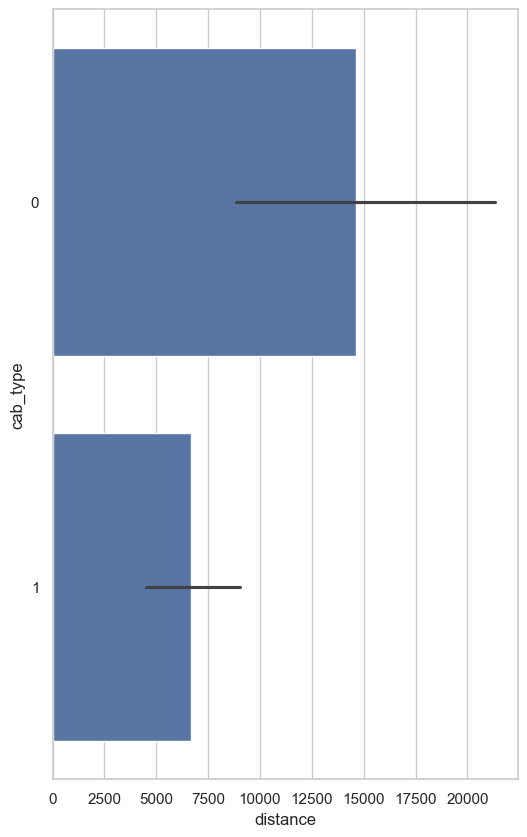

In [69]:
sns.set(rc={'figure.figsize':(6,10)})
sns.set_style("whitegrid")

sns.barplot(data=dff, y="cab_type", x="distance", orient="h")

Text(0, 0.5, 'RainTomorrow')

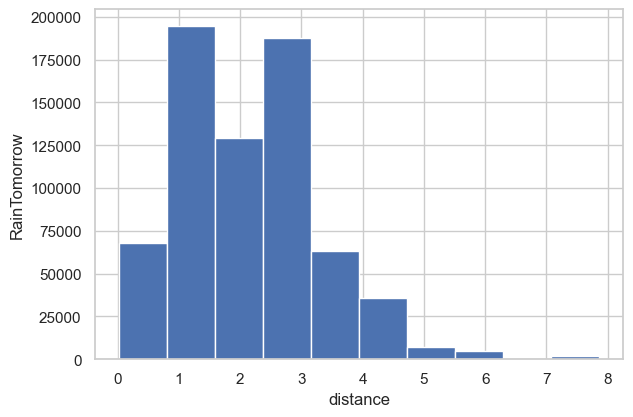

In [70]:
 #plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = ridecop_enc.distance.hist(bins=10)
fig.set_xlabel('distance')
fig.set_ylabel('RainTomorrow')




In [71]:
dff = ridecop_enc.groupby(['cab_type', 'price']).mean()

dff

hour        day      month    source  destination  \
cab_type price                                                           
0        2.5    10.867299  17.649289  11.611374  5.582938     5.611374   
         3.0    11.544110  17.711348  11.589933  5.614830     5.843587   
         3.5    11.489038  17.805254  11.587794  5.631049     5.784120   
         5.0    11.639218  17.883973  11.583702  5.377194     5.657699   
         7.0    11.679915  17.785987  11.586339  5.529217     5.593618   
...                   ...        ...        ...       ...          ...   
1        76.0   18.500000  28.000000  11.000000  6.500000     3.000000   
         80.5    7.000000  18.000000  12.000000  7.000000     8.000000   
         81.5    1.000000  29.000000  11.000000  4.000000     2.000000   
         87.0   17.000000  14.000000  12.000000  4.000000     2.000000   
         89.5   17.000000  30.000000  11.000000  4.000000     8.000000   

                    name  distance  surge_multiplier   latitude  longitude  \
cab_type price                                                               
0        2.5    7.000000  1.249052          1.000000  42.336201 -71.064508   
         3.0    7.000000  1.486235          1.000000  42.338628 -71.066021   
         3.5    7.000000  1.477592          1.000000  42.338882 -71.066496   
         5.0    6.981590  1.493955          1.000000  42.338632 -71.066366   
         7.0    6.100773  1.908061          1.000098  42.338288 -71.066173   
...                  ...       ...               ...        ...        ...   
1        76.0   6.000000  4.935000          1.000000  42.358300 -71.084250   
         80.5   1.000000  3.370000          1.000000  42.350300 -71.081000   
         81.5   1.000000  4.440000          1.000000  42.364700 -71.054200   
         87.0   1.000000  5.560000          1.000000  42.350300 -71.081000   
         89.5   1.000000  7.460000          1.000000  42.214800 -71.033000   

                ...  cloudCover   uvIndex  visibility.1       ozone  \
cab_type price  ...                                                   
0        2.5    ...    0.738199  0.184834      8.259109  315.938863   
         3.0    ...    0.683668  0.249504      8.452768  313.586217   
         3.5    ...    0.687669  0.253605      8.437939  313.752420   
         5.0    ...    0.684157  0.246753      8.486774  313.993778   
         7.0    ...    0.684981  0.250300      8.484455  313.516146   
...             ...         ...       ...           ...         ...   
1        76.0   ...    1.000000  0.500000      8.996000  285.250000   
         80.5   ...    0.990000  0.000000      7.113000  362.800000   
         81.5   ...    0.770000  0.000000      9.915000  349.900000   
         87.0   ...    0.160000  1.000000      9.962000  289.100000   
         89.5   ...    0.860000  1.000000      9.928000  271.700000   

                moonPhase  precipIntensityMax  temperatureMin  temperatureMax  \
cab_type price                                                                  
0        2.5     0.562559            0.038992       33.111280       44.777773   
         3.0     0.581600            0.037098       33.483199       45.301524   
         3.5     0.578216            0.038519       33.624756       45.371677   
         5.0     0.578120            0.037081       33.424093       45.242064   
         7.0     0.580811            0.037322       33.492475       45.284249   
...                   ...                 ...             ...             ...   
1        76.0    0.715000            0.061450       34.435000       44.270000   
         80.5    0.370000            0.002800       23.230000       38.100000   
         81.5    0.720000            0.000000       33.850000       42.610000   
         87.0    0.240000            0.000000       26.930000       46.680000   
         89.5    0.790000            0.000000       28.900000       42.130000   

                apparentTemperatureMin  apparentTemperatureMax  


---

## 6. Crear la matriz de atributos $X$ y el vector de etiquetas $y$.

In [72]:
y = ridecop_enc['cab_type']#vector de etiquetas
X= ridecop_enc.drop('cab_type',axis=1)


In [73]:
X.head()

,hour,day,month,source,destination,name,price,distance,surge_multiplier,latitude,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,5,7,7,5.0,0.44,1.0,42.2148,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,5,7,2,11.0,0.44,1.0,42.2148,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,5,7,5,7.0,0.44,1.0,42.2148,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,5,7,4,26.0,0.44,1.0,42.2148,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,5,7,6,9.0,0.44,1.0,42.2148,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [74]:
X.dtypes

hour                             int64
day                              int64
month                            int64
source                           int32
destination                      int32
name                             int32
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
long_summary                     int32
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                       float64
visibility                     float64
temperatureHigh                float64
temperatureLow                 float64
temperatureLowTime               int64
apparentTemperatureHigh        float64
apparentTemperatureHighTime      int64
apparentTemperatureLow   

In [75]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cab_type, dtype: int32

---

## 6.1 Escalado de los datos usando _StandardScaler_.

_StandardScaler_ calcula y resta la media de las muestras, para luego escalar la varianza a la unidad. La **puntuación estándar** (_Z-Score_) de una muestra $x$ se calcula como: $z = \frac{(x - \mu)}{s}$ donde $\mu$ es la media de las muestras de entrenamiento o 0, si ```with_mean=False```; y $s$ es la desviación estándar de las muestras de entrenamiento o 1, si ```with_std=False```.

In [76]:
sc = StandardScaler()
ss_data = sc.fit_transform(X.values) # fit_transform receives and returns an ndarray
Xsc = pd.DataFrame(data=ss_data, columns=X.columns)

In [77]:
Xsc.describe()

,hour,day,month,source,destination,name,price,distance,surge_multiplier,latitude,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
count,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,...,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05
mean,1.398385e-17,-1.855629e-18,-1.668261e-15,9.887117e-17,-5.741171e-17,-2.498435e-17,3.411691e-16,5.107182e-16,8.278974e-16,-1.049109e-13,...,2.149659e-16,-9.411420e-17,-1.292461e-15,4.524740e-15,1.039152e-16,2.868945e-16,-9.799769e-16,3.949106e-16,-2.063787e-15,2.901957e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.672273e+00,-1.682418e+00,-1.191411e+00,-1.593327e+00,-1.593380e+00,-1.600311e+00,-1.536420e+00,-1.904786e+00,-1.513489e-01,-2.578871e+00,...,-1.914747e+00,-5.250161e-01,-2.977837e+00,-1.578134e+00,-1.998592e+00,-6.769040e-01,-2.756637e+00,-2.081705e+00,-2.520361e+00,-1.880878e+00
25%,-8.087290e-01,-4.802876e-01,-1.191411e+00,-7.237682e-01,-7.238051e-01,-8.067826e-01,-7.572493e-01,-7.984905e-01,-1.513489e-01,2.535031e-01,...,-8.827669e-01,-5.250161e-01,-1.381945e-02,-8.089866e-01,-1.140416e+00,-6.769040e-01,-5.083753e-01,-4.767570e-01,-2.771964e-01,-7.823946e-01
50%,5.481532e-02,-7.957747e-02,8.393412e-01,-1.440622e-01,-1.440887e-01,-1.325389e-02,-3.120086e-01,-2.583969e-02,-1.513489e-01,2.869481e-01,...,3.723438e-01,-5.250161e-01,5.424861e-01,-2.187109e-01,4.124739e-01,-6.696595e-01,1.209524e-01,-1.029776e-01,5.611406e-02,-1.509828e-01
75%,9.183596e-01,1.022375e+00,8.393412e-01,7.254967e-01,7.254859e-01,7.802749e-01,6.897828e-01,6.414497e-01,-1.513489e-01,5.545081e-01,...,8.743881e-01,-5.250161e-01,5.870520e-01,6.541816e-01,8.619946e-01,9.821031e-01,8.384168e-01,2.920593e-01,8.408702e-01,3.059979e-01
max,1.637980e+00,1.222730e+00,8.393412e-01,1.595056e+00,1.595060e+00,1.573804e+00,9.038045e+00,4.978831e+00,2.167290e+01,5.837725e-01,...,8.743881e-01,3.693537e+00,5.885887e-01,2.339150e+00,1.434112e+00,1.965554e+00,1.490938e+00,2.233586e+00,1.451236e+00,2.191584e+00


In [78]:
Xsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         693071 non-null  float64
 1   day                          693071 non-null  float64
 2   month                        693071 non-null  float64
 3   source                       693071 non-null  float64
 4   destination                  693071 non-null  float64
 5   name                         693071 non-null  float64
 6   price                        693071 non-null  float64
 7   distance                     693071 non-null  float64
 8   surge_multiplier             693071 non-null  float64
 9   latitude                     693071 non-null  float64
 10  longitude                    693071 non-null  float64
 11  temperature                  693071 non-null  float64
 12  apparentTemperature          693071 non-null  float64
 13 

---

## 5.2 Escalado de los datos usando _MinMaxScaler_.

In [79]:
scaler = MinMaxScaler() 
norm_data = scaler.fit_transform(X.values)
Xnorm = pd.DataFrame(data=norm_data, columns=X.columns)

In [80]:
Xnorm.head()

,hour,day,month,source,destination,name,price,distance,surge_multiplier,latitude,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,0.391304,0.517241,1.0,0.454545,0.636364,0.583333,0.026316,0.053571,0.0,0.0,...,0.72,0.0,1.000000,0.314155,0.250000,0.874572,0.883145,0.417488,0.776204,0.322832
1,0.086957,0.896552,0.0,0.454545,0.636364,0.166667,0.089474,0.053571,0.0,0.0,...,1.00,0.0,0.438328,0.198174,0.654762,0.891021,0.904987,0.566092,0.863669,0.529912
2,0.043478,0.931034,0.0,0.454545,0.636364,0.416667,0.047368,0.053571,0.0,0.0,...,0.03,0.0,1.000000,0.422831,0.702381,0.729267,0.718238,0.576355,0.680949,0.536991
3,0.173913,1.000000,0.0,0.454545,0.636364,0.333333,0.247368,0.053571,0.0,0.0,...,0.00,0.0,1.000000,0.198174,0.785714,0.000000,0.693120,0.472906,0.654745,0.339115
4,0.130435,0.965517,0.0,0.454545,0.636364,0.500000,0.068421,0.053571,0.0,0.0,...,0.44,0.0,1.000000,0.715068,0.750000,0.000685,0.635967,0.355911,0.612606,0.240708


In [81]:
Xnorm.describe()

,hour,day,month,source,destination,name,price,distance,surge_multiplier,latitude,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
count,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,0.505180,0.579116,0.586684,0.499729,0.499736,0.504176,0.145295,0.276713,0.006935,0.815416,...,0.686502,0.124454,0.834964,0.402864,0.582221,0.256165,0.648991,0.482402,0.634596,0.461853
std,0.302092,0.344217,0.492429,0.313639,0.313633,0.315049,0.094568,0.145273,0.045821,0.316191,...,0.358534,0.237048,0.280393,0.255279,0.291316,0.378436,0.235429,0.231734,0.251788,0.245552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260870,0.413793,0.000000,0.272727,0.272727,0.250000,0.073684,0.160714,0.000000,0.895572,...,0.370000,0.000000,0.831089,0.196347,0.250000,0.000000,0.529305,0.371921,0.564802,0.269735
50%,0.521739,0.551724,1.000000,0.454545,0.454545,0.500000,0.115789,0.272959,0.000000,0.906147,...,0.820000,0.000000,0.987073,0.347032,0.702381,0.002742,0.677466,0.458539,0.648725,0.424779
75%,0.782609,0.931034,1.000000,0.727273,0.727273,0.750000,0.210526,0.369898,0.000000,0.990747,...,1.000000,0.000000,0.999569,0.569863,0.833333,0.627827,0.846378,0.550082,0.846317,0.536991
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---

## 6. Evaluar el error: _RMSE_ vs. _MAE_

El _error cuadrático medio_ (**RMSE**) funciona de la siguiente manera:

    - Se resta la diferencia entre el valor pronosticado y el valor real, en cada punto que se pronostica, y el resultado se eleva al cuadrado.
    - Se suman todos los resultados del punto anterior.
    - Se divide el valor de la suma total entre la cantidad de puntos pronosticados.
    - Se obtiene la raíz cuadrada del resultado, este es el RMSE.

$$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i-\hat y_i)^2}$$

El _error absoluto medio_ (**MAE**) funciona de la siguiente manera:

    - Se resta la diferencia entre el valor pronosticado y el valor real, en cada punto que se pronostica.
    - Se saca el valor absoluto del resultado anterior.
    - Se suman todos los resultados individuales.
    - Se divide el valor de la suma total entre la cantidad de puntos pronosticados.
    - El MAE es un promedio de los errores. Se obtiene un número, un valor alto representa un error alto.

$$MAE = \frac{1}{N}\sum_{i=1}^{N}|y_i-\hat y_i|$$

In [82]:
def predicciones(tree, X, label):#aprendizaje supervissado, queremos las etiquetas para comprobar el porcentaje de acierto del modelo
    y_pred = tree.predict(X)#usamos la funcion predic con nuestro modelo, es decir las calsificacion con nuestro modelo
    y_true = label
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)#mostrar matriz de concfusion para ver aciertos y fallos
    disp.plot()
    plt.show()

    acc = accuracy_score(y_true, y_pred)#metrica de excatitud para calcular en cuantos casos acerto el modelo y en cuantos no
    f1 = f1_score(y_true, y_pred, average='weighted')# "weighted" se usa porque no esta balanceado el número de muestras
    #de casa clase. calcula el score f1 para cada clase y lo pondera 
    print(f'Accuracy = {acc * 100:.2f}%')
    print(f'F1 Score = = {f1 * 100:.2f}%')

In [83]:

    # Dividir los datos en el conjunto de entrenamiento y el de prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        shuffle=True)
    
    # Construir el modelo
    # model = LogisticRegression()
    # model.fit(X_train, y_train)
    
    # # Realizar las predicciones
    # y_pred = model.predict(X_test)

    # acc = accuracy_score(y_test, y_pred)#metrica de excatitud para calcular en cuantos casos acerto el modelo y en cuantos no
    # f1 = f1_score(y_test, y_pred, average='weighted')# "weighted" se usa porque no esta balanceado el número de muestras
    # #de casa clase. calcula el score f1 para cada clase y lo pondera 
    # print(f'Accuracy = {acc * 100:.2f}%')
    # print(f'F1 Score = = {f1 * 100:.2f}%')

    #acc= accuracy_score(y_test, y_pred)
    #f1= f1_score(y_test, y_pred)
    # rmse = mean_squared_error(y_test, y_pred, squared=False)
    # mae = mean_absolute_error(y_test, y_pred)
    # print(f'RMSE = ${rmse:,.2f} dollars')
    # print(f'MAE = ${mae:,.2f} dollars')
    
    # plt.plot(y_test.index, y_test, 'o')
    # plt.plot(y_test.index, y_pred, 'o')
    
    # return y_test, y_pred
    # print(f'Accuracy = {acc * 100:.2f}%')
    # print(f'F1 Score = = {f1 * 100:.2f}%')
    

#es necesario convertir cap type a ohe 

In [84]:
# Construir el modelo
model = LogisticRegression()
    

In [85]:
model.fit(X_train, y_train)

LogisticRegression()

In [86]:
# # Realizar las predicciones
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [87]:
# # Realizar las predicciones
y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred_prob

#el valor se compara con 0.5, si la probabilidad es p>0.5, el dato es etiquetado como 1 sino como 0.


array([0.55672029, 0.55677084, 0.55671092, ..., 0.55676448, 0.55670744,
       0.55675511])

In [88]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[     0,  92356],
       [     0, 115566]], dtype=int64)

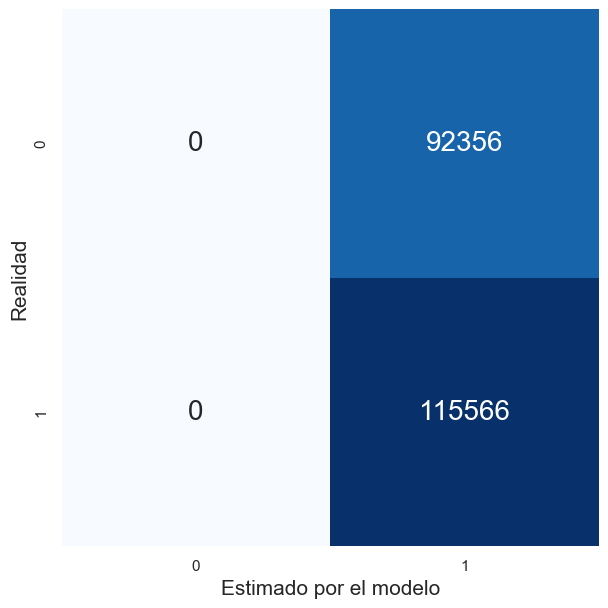

In [89]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [90]:
# Cálculo de medidas de evaluación del modelo
# Precisión: de todas las clasificaciones positivas que hicimos, ¿cuántas de ésas eran en realidad positivas?
# Exactitud: del total de clasificaciones que hicimos, ¿cuántas fueron hechas correctamente?
# Sensibilidad: de todas las clasificaciones positivas que había en realidad, ¿cuántas fueron hechas correctamente como positivas?
# Especificidad: de todas las clasificaciones negativas que había en realidad, ¿cuántas fueron hechas correctamente como negativas?
#score F1  es una medida (media armónica) de la precisión ( que considera falsos positivos) y del recall (que considera falsos negativos) 

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Score f1:", metrics.f1_score(y_test, y_pred, average='weighted'))# "weighted" se usa porque no esta balanceado el número de muestras





Precision: 0.5558141995556026
Exactitud: 0.5558141995556026
Sensibilidad: 1.0
Score f1: 0.39712894318084613


A través de la curva ROC vamos a calcular el cambio en la proporción de Verdaderos Positivos contra la proporción de Falsos Positivos:

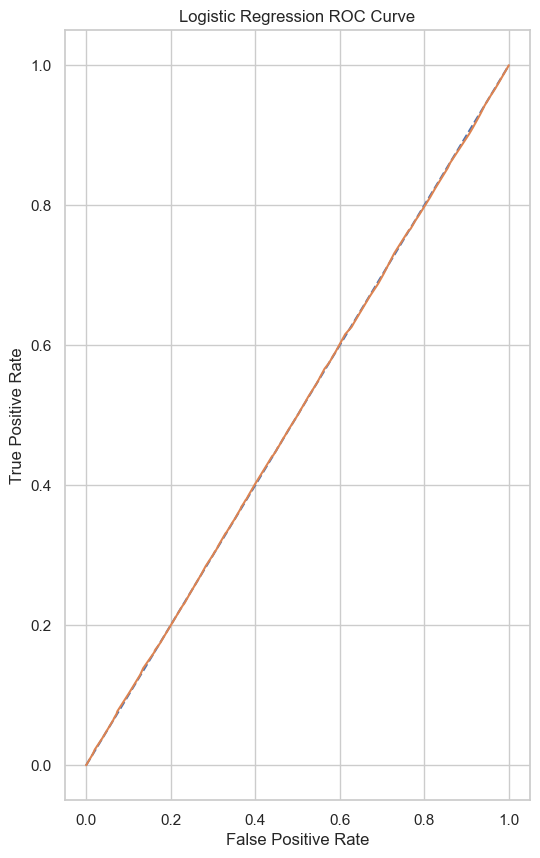

In [44]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression ROC Curve')
plt.show()

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange',
#          label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Proporción Positivos False')
# plt.ylabel('Proporción Positivos Verdaderos')
# plt.title('Curva ROC / AUC')
# plt.legend(loc="lower right")
# plt.show()

# from sklearn.metrics import roc_curve
# import matplotlib.pyplot as plt

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# plt.plot([0,1], [0,1], '--')
# plt.plot(fpr, tpr)
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title('Logistic Regression ROC Curve')
# plt.show()

In [45]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob)

0.5000882772438168

El AUC (area bajo la curva) mientras mayor sea es mejor, vemos que es 0.5 lo que implica que el modelo no tiene un buen poder predictivo

---

## 7.1 Probar la regresión con los datos _estandarizados_ (_StandardScaler_).

In [95]:
y_test_sc, y_sc = regression(Xsc, y)

Precision: 0.7095019221126525
Exactitud: 0.6849299256451938
Sensibilidad: 0.7341155921416713
Score f1: 0.6841150409237367


TypeError: cannot unpack non-iterable NoneType object

---

## 7.2 Probar la regresión con los datos _normalizados_ (_MinMaxScaler_).

In [96]:
y_test_norm, y_norm = regression(Xnorm, y)

C:\Users\pauly\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision: 0.7098437800382819
Exactitud: 0.6849203066534566
Sensibilidad: 0.7338644867485288
Score f1: 0.6841232724414572


TypeError: cannot unpack non-iterable NoneType object

> **Para este caso en particular**, al usar _MinMaxScaler_ se obtienen mejores resultados que con _StandardScaler_.


## 8.Conclusión
#### En esta práctica se entrenó  un modelo de regresión logística  que con base en las muestras (X) se el servicio lo realizó Uber o Lytf
#### Se con concluye que:

Las métricas del modelo son:
- Precision: 0.5558141995556026
- Exactitud: 0.5558141995556026
- Sensibilidad: 1.0
- Score f1: 0.39712894318084613


-score F1  es una medida (media armónica) de la precisión ( que considera falsos positivos) y del recall (que considera falsos negativos) 

- la precisión hace referencia a en cuantos casos acertó el modelo, en este caso accuracy fue de 55%, quiere decir que el modelo acierta en 55%  casos de 100 
- La metrica de exactitud hace referencia a en cuantos casos acertó el modelo, en este caso accuracy fue de 0.55%, quiere decir que el modelo acierta en 55 casos de 100 
- score F1 es del 39%, es bajo ya que considera falsos positivos (precisión) y falsos negativos ( recall/sensibilidad) nos habla de confiabilidad del modelo


Con los datos estandarizados (StandardScaler) se obtuvo:
  
- Precision: 0.7095019221126525
- Exactitud: 0.6849299256451938
- Sensibilidad: 0.7341155921416713
- Score f1: 0.6841150409237367 


Con  datos normalizados (MinMaxScaler) se obtuvo:


- Precision: 0.7098437800382819
- Exactitud: 0.6849203066534566
- Sensibilidad: 0.7338644867485288
- Score f1: 0.6841232724414572

  
  Para este caso obtenemos resultados ligeramente mejores con datos normalizados con MinMaxScaler, pues vemos que precisión es de 70% y el score f1 es de 68% 